#Tarea 2 Gladys Hernandez


---

Utilizando una o varias de los modelos de aprendizaje para clasificación, intentar ajustarlos a los modelos realizados en la practica. Se evaluara también que estrategias se utilizaron para elegir el modelo. Si se requiere hacer subsanación de datos, cuales son las características adecuadas. 



Contexto de la base de datos


---


Nuestro ejercicio gira alrededor de una base de datos de personas en Washington que solicitaron un credito hipotecario, esta base contiene las carateristicas tanto del solicitante como del credito que solicitan y al final incluye la respuesta de si se origino el prestamo o no.

Esta base contiene aproximadamente 460,000 datos

##Lectura de datos


---
Comenzamos leyendo los datos y limpiando NA´s y duplicados


In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
import os

In [14]:
#Import scikit-learn dataset library
#Load dataset
data=pd.read_csv( low_memory = False , filepath_or_buffer='/content/HDMA-2016.csv')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465815 entries, 0 to 465814
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   tract_to_msamd_income           465204 non-null  float64
 1   population                      465209 non-null  float64
 2   minority_population             465209 non-null  float64
 3   number_of_owner_occupied_units  465197 non-null  float64
 4   number_of_1_to_4_family_units   465208 non-null  float64
 5   loan_amount_000s                465815 non-null  int64  
 6   hud_median_family_income        465213 non-null  float64
 7   applicant_income_000s           465815 non-null  int64  
 8   sequence_number                 465815 non-null  int64  
 9   purchaser_type_name             465815 non-null  object 
 10  property_type_name              465815 non-null  object 
 11  preapproval_name                465815 non-null  object 
 12  owner_occupancy_

In [16]:
data.shape

(465815, 28)

In [17]:
data=data.dropna()

In [18]:
data.isna().sum().sort_values()

tract_to_msamd_income             0
agency_name                       0
applicant_ethnicity_name          0
applicant_race_name_1             0
applicant_sex_name                0
census_tract_number               0
co_applicant_ethnicity_name       0
co_applicant_race_name_1          0
co_applicant_sex_name             0
county_name                       0
hoepa_status_name                 0
lien_status_name                  0
loan_purpose_name                 0
loan_type_name                    0
owner_occupancy_name              0
preapproval_name                  0
property_type_name                0
purchaser_type_name               0
sequence_number                   0
applicant_income_000s             0
hud_median_family_income          0
loan_amount_000s                  0
number_of_1_to_4_family_units     0
number_of_owner_occupied_units    0
minority_population               0
population                        0
agency_abbr                       0
action_taken_name           

In [19]:
data.shape

(465193, 28)

Revisando un posible desbalanceo de datos analizo en mi variable de respuesta:

*   Loan originated: 1
*   Loan not originated (for any reason): 0

Viendo el histograma parece que si hay suficiente información dentro de esta para considerar que hay buena cantidad de datos para ambos outcomes.



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'action_taken_name')

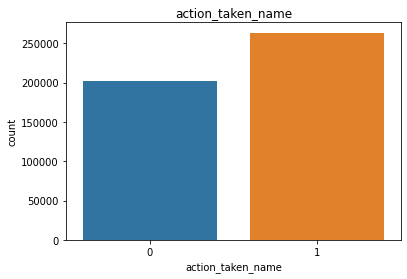

In [20]:
sns.countplot(data['action_taken_name'])
fig = plt.gcf()
#fig.set_size_inches(10,10)
plt.title('action_taken_name')

##Set de entrenamiento y set de prueba

---

Para todos los modelos que usaremos se necesita dividir nuestro set de datos en nuestra variable dependiente "action_taken_name" y las variables independientes (todas las demás).

Encima de eso necesitamos dividir nuestro set en set de entrenamiento y set de prueba para poder medir la eficacia de nuestro modelo en datos que no hayan sido los que se usaron para crear el modelo.

In [21]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data.iloc[:,:-1]
y=data["action_taken_name"]

Dado que mi base contiene informacion categorica es necesario aplicar una codificación para poder usarlo en estos modelos, en este caso probaremos con LabelEncoder

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
X['loan_type_name']=le.fit_transform(X['loan_type_name'])
X['loan_purpose_name']=le.fit_transform(X['loan_purpose_name'])
X['applicant_ethnicity_name']=le.fit_transform(X['applicant_ethnicity_name'])
X['purchaser_type_name']=le.fit_transform(X['purchaser_type_name'])
X['applicant_sex_name']=le.fit_transform(X['applicant_sex_name'])
X['agency_name']=le.fit_transform(X['agency_name'])
X['agency_abbr']=le.fit_transform(X['agency_abbr'])
X['co_applicant_sex_name']=le.fit_transform(X['co_applicant_sex_name'])
X['co_applicant_race_name_1']=le.fit_transform(X['co_applicant_race_name_1'])
X['co_applicant_ethnicity_name']=le.fit_transform(X['co_applicant_ethnicity_name'])
X['hoepa_status_name']=le.fit_transform(X['hoepa_status_name'])
X['preapproval_name']=le.fit_transform(X['preapproval_name'])
X['lien_status_name']=le.fit_transform(X['lien_status_name'])
X['property_type_name']=le.fit_transform(X['property_type_name'])
X['owner_occupancy_name']=le.fit_transform(X['owner_occupancy_name'])
X['county_name']=le.fit_transform(X['county_name'])
X['applicant_race_name_1']=le.fit_transform(X['applicant_race_name_1'])

In [24]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

##Modelos a utilizar


---


Usare para este modelo los siguientes modelos de clasificacion:


*   Regresion Logistica
*   Clasificador Naive Bayes
*   K-nearest neighbor
*   Arbol de decision
*   Random Forest

Librerias para modelos

Cargamos las librerias de los modelos que vamos a utilizar.

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#K nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
#Naive bayes
from sklearn.naive_bayes import GaussianNB

#Gaussian
from sklearn.gaussian_process import GaussianProcessClassifier

#Decision tree
from sklearn.tree import DecisionTreeClassifier

#Maquina de soporte vectorial
from sklearn.svm import SVC

#Red neuronal
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
#Randomforest
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


#Metricas de evaluacion
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



###Regresion Logistica

---

La razon por la cual considero que una regresion Logistica podria funcionar para mis datos es dado que despues de realizar el preprocesamiento de la información dividi mis resultados en dos clases: Se origino el prestamo o no se origino el prestamo.

El proposito de este estudio es descubrir si podemos clasificar correctamente el comportamiento de los clientes para poder predecir con exactitud quienes terminaran con un prestado al final y quienes no.


In [26]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16,max_iter=10000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred_RL = logreg.predict_proba(X_test)[:, 1]

In [27]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7552200518780722


In [28]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[46612, 13482],
       [20679, 58785]])

Text(0.5, 257.44, 'Predicted label')

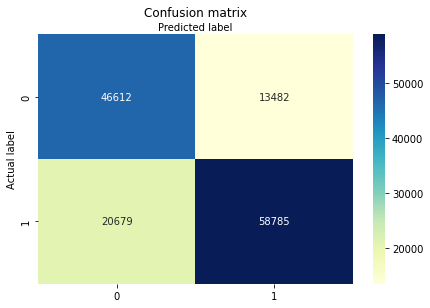

In [29]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [30]:
from sklearn.metrics import classification_report
target_names = ['Loan not originated','Loan originated']
print(classification_report(y_test, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

Loan not originated       0.69      0.78      0.73     60094
    Loan originated       0.81      0.74      0.77     79464

           accuracy                           0.76    139558
          macro avg       0.75      0.76      0.75    139558
       weighted avg       0.76      0.76      0.76    139558



**Conclusiones de Regresion Logistica:** Parece tener un buen ajuste, aunque se ocuparon muchas iteraciones por lo que el tiempo eso afecto un poco el tiempo de procesamiento, tambien parece que es mejor precidiendo los prestamos que si se originaron mucho más que los que no se originaron.

###Naive Bayes

---

La Razón por la cual incluyo este modelo es porque dada la cantidad de datos considere bueno explorar clasificadores que tengan un corto tiempo de procesamiento

In [31]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
y_pred_NB = gnb.predict_proba(X_test)[:, 1]

In [32]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5923128735006234


In [33]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10659, 49435],
       [ 7461, 72003]])

Text(0.5, 257.44, 'Predicted label')

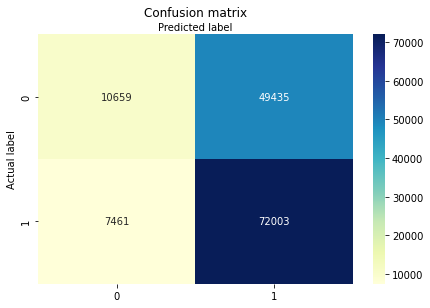

In [34]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
from sklearn.metrics import classification_report
target_names = ['Loan not originated','Loan originated']
print(classification_report(y_test, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

Loan not originated       0.59      0.18      0.27     60094
    Loan originated       0.59      0.91      0.72     79464

           accuracy                           0.59    139558
          macro avg       0.59      0.54      0.49    139558
       weighted avg       0.59      0.59      0.53    139558



**Conclusiones de Naive Bayes:** Definitivamente no es buen modelo, es practicamente aleatorio si decidira si se originara un prestamo o no. Apesar de ser el más rapido.

###K-nearest neighbor


---


La Razón por la cual incluyo este modelo de clasificación es por que cuando comence a investigar sobre el tema encontre ejemplos donde esta clase de problematicas las enfrentan usando clusters, por lo que considere que seria interesante explorar usar k nearest neighor

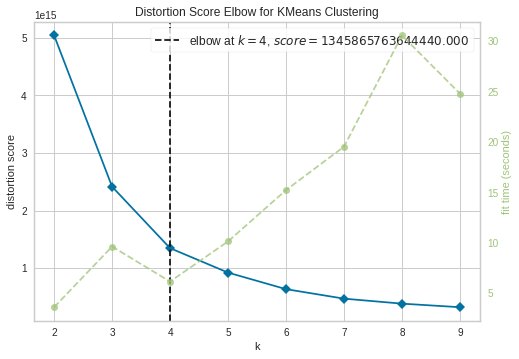

In [36]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
#
#
# Instantiate the clustering model and visualizer
#
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [37]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=4)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
y_pred_knn = knn.predict_proba(X_test)[:, 1]

In [38]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5426202725748435


In [39]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[37006, 23088],
       [40743, 38721]])

Text(0.5, 352.48, 'Predicted label')

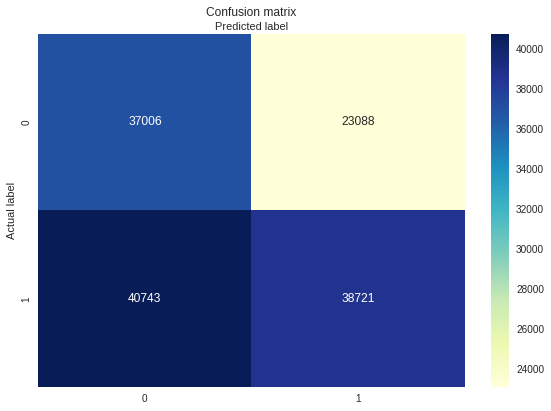

In [40]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
from sklearn.metrics import classification_report
target_names = ['Loan not originated','Loan originated']
print(classification_report(y_test, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

Loan not originated       0.48      0.62      0.54     60094
    Loan originated       0.63      0.49      0.55     79464

           accuracy                           0.54    139558
          macro avg       0.55      0.55      0.54    139558
       weighted avg       0.56      0.54      0.54    139558



**Conclusiones de K-nearest neighbor:** Tardo 15 minutos en correr y su accuracy es mala, es casi aleatoreo por lo que no lo considero un buen modelo

###Arboles de Decision


---


La Razón por la cual incluyo este modelo de clasificación es porque la base de datos que manejo me ofrece la opcion de que el resultado no sea solo "consigue prestamo" o "no consigue prestamo", tambien hay una columna donde te dice si se ofrecio un prestamo pero lo rechazo, o si se les denego el prestamo desde la sokicitud de preaprovacion entre otros outcomes, dado en caso de querer explorar esa direccion este modelo de clasificacion me permite predecir resultados no binarios a diferencia de modelos como regresion logistica.

In [42]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [43]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [44]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8839550581120394


In [46]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred_DT = clf.predict_proba(X_test)[:, 1]
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8793548202181172


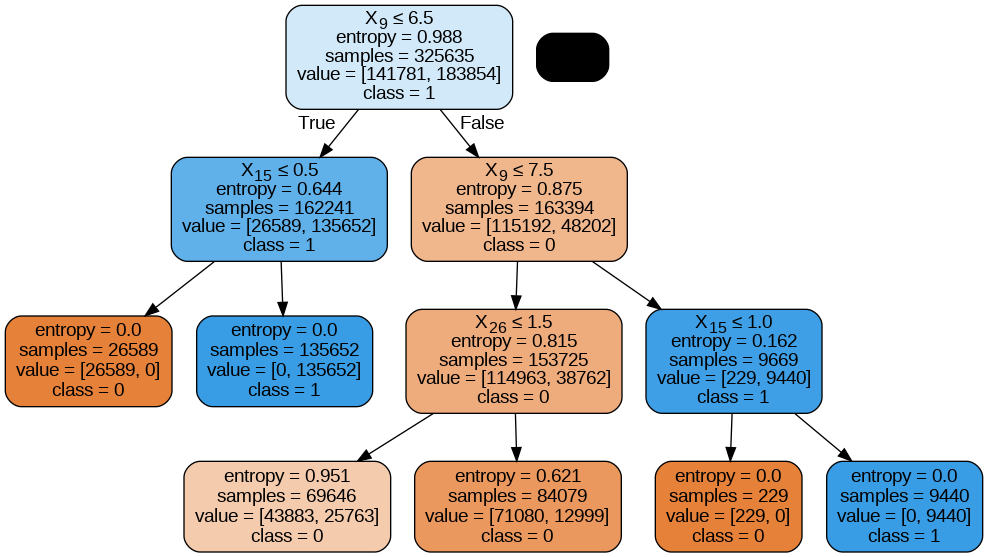

In [47]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('home_loans_2.png')
Image(graph.create_png())

In [48]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[60094,     0],
       [16837, 62627]])

Text(0.5, 352.48, 'Predicted label')

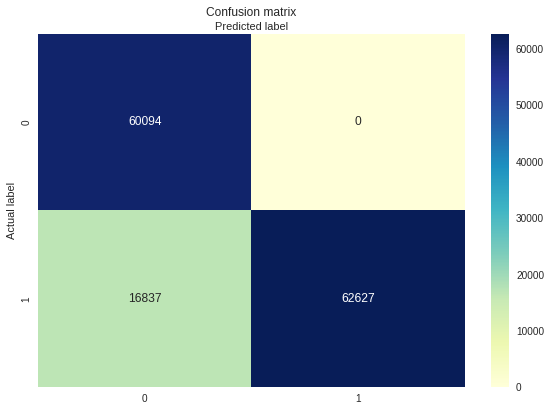

In [49]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [50]:
from sklearn.metrics import classification_report
target_names = ['Loan not originated','Loan originated']
print(classification_report(y_test, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

Loan not originated       0.78      1.00      0.88     60094
    Loan originated       1.00      0.79      0.88     79464

           accuracy                           0.88    139558
          macro avg       0.89      0.89      0.88    139558
       weighted avg       0.91      0.88      0.88    139558



**Conclusiones de Arboles de decisión:** A menos que use entropy se tarda mucho el modelo en correr, me llama la atencion que parece que su presicion para clasificar los que consiguen un prestamo es mejor que para aquellos que no lo generan, me causa sospecha este resultado y es por esto que tendria que considerar bien si usar o no este modelo.

###Random Forest

---

La Razón por la cual incluyo este modelo de clasificación es por las mismas ventajas por las que probamos Arboles de decisión, pero con una presición todavia mayor.




In [51]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred_RF = clf.predict_proba(X_test)[:, 1]

In [52]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9099227561300678


In [53]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9485669836245859
Recall: 0.8900634249471459


In [54]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[56259,  3835],
       [ 8736, 70728]])

Text(0.5, 352.48, 'Predicted label')

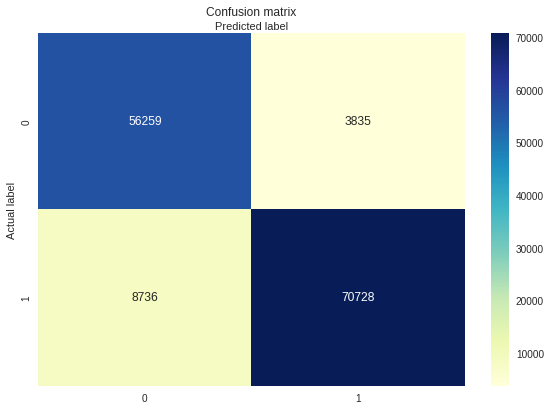

In [55]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [57]:
from sklearn.metrics import classification_report
target_names = ['Loan not originated','Loan originated']
print(classification_report(y_test, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

Loan not originated       0.87      0.94      0.90     60094
    Loan originated       0.95      0.89      0.92     79464

           accuracy                           0.91    139558
          macro avg       0.91      0.91      0.91    139558
       weighted avg       0.91      0.91      0.91    139558



**Conclusiones de Random Forest:** La presicion de este modelo excelente, incluso si no es el más rapido en cuanto a tiempo de procesamiento.

###Comparacion usando AUC y Curva ROC


---

Podemos ver en la misma grafica la curva ROC de los modelos utilizados para ver mejor sus diferencias en exactitud considerando estas metricas:

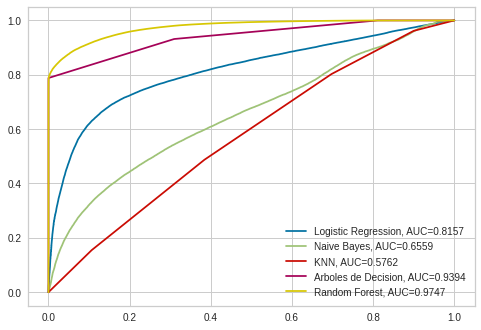

In [58]:
#set up plotting area
plt.figure(0).clf()

#logistic regression

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_RL)
auc = round(metrics.roc_auc_score(y_test, y_pred_RL), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

# NAIVE BAYES

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_NB)
auc = round(metrics.roc_auc_score(y_test, y_pred_NB), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC="+str(auc))

# KNN

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_knn)
auc = round(metrics.roc_auc_score(y_test, y_pred_knn), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))


# Arboles de Decision
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_DT)
auc = round(metrics.roc_auc_score(y_test, y_pred_DT), 4)
plt.plot(fpr,tpr,label="Arboles de Decision, AUC="+str(auc))

# Random Forest
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_RF)
auc = round(metrics.roc_auc_score(y_test, y_pred_RF), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#add legend
plt.legend()

#Conclusiones Finales
---
Revisando todas las metricas y la composicion de los resultados, considero que Random Forest da tanto el ajuste más alto como consistente en prestamos que se originan y prestamos que no se originan, además el tiempo de procesamiento es razonablemente rapido en comparacion con metodologias como KNN o inclusive Logistic Regression.
